# Data Science Intern at Prodigy Infotech
Name - Ishika Vijay Taklikar 

Task_2: Build a decision tree classifier to predict whether a customer will purchase a product or service based on their                 demographic and behavioral data.
        
Software - Jupyter Notebook

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [111]:
df=pd.read_csv('bank.csv')

In [112]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [113]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [114]:
df.shape

(11162, 17)

In [115]:
df=df.fillna(df.mean())
df=pd.get_dummies(df)
print(df.columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'deposit_no', 'deposit_yes'],
      dtype='object')


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   balance              11162 non-null  int64
 2   day                  11162 non-null  int64
 3   duration             11162 non-null  int64
 4   campaign             11162 non-null  int64
 5   pdays                11162 non-null  int64
 6   previous             11162 non-null  int64
 7   job_admin.           11162 non-null  uint8
 8   job_blue-collar      11162 non-null  uint8
 9   job_entrepreneur     11162 non-null  uint8
 10  job_housemaid        11162 non-null  uint8
 11  job_management       11162 non-null  uint8
 12  job_retired          11162 non-null  uint8
 13  job_self-employed    11162 non-null  uint8
 14  job_services         11162 non-null  uint8
 15  job_student          11162 non-null  uint8
 16  job_technician       1

In [117]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit_no,deposit_yes
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,...,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557,0.119513,0.174162,0.029385,...,0.253001,0.084483,0.035119,0.028579,0.110016,0.048110,0.095951,0.745924,0.526160,0.473840
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007,0.324405,0.379266,0.168892,...,0.434751,0.278123,0.184089,0.166628,0.312924,0.214008,0.294537,0.435360,0.499338,0.499338
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
df.isnull().sum()

age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
default_no             0
default_yes            0
housing_no             0
housing_yes            0
loan_no                0
loan_yes               0
contact_cellular       0
contact_telephone      0
contact_unknown        0
month_apr              0
month_aug              0
month_dec              0
month_feb              0
month_jan              0


In [138]:
x=df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
y=df['deposit_yes']

# Splitting data into training and testing sets
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Decision Tree Classifier

In [131]:
# Initialize and fit the DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)


DecisionTreeClassifier()

In [121]:
# Make Predictions
y_pred = dtc.predict(x_test)

In [122]:
# Evaluate the Model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73      1166
           1       0.70      0.69      0.70      1067

    accuracy                           0.71      2233
   macro avg       0.71      0.71      0.71      2233
weighted avg       0.71      0.71      0.71      2233



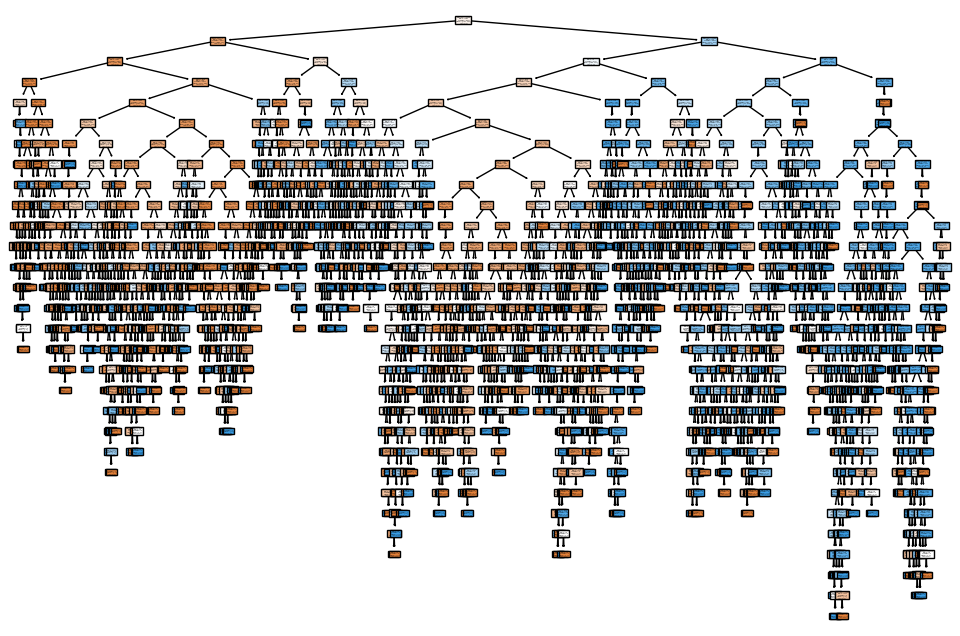

In [139]:
plt.figure(figsize=(12, 8))
tree.plot_tree(dtc, feature_names=x_encoded.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

In [124]:
# Feature Importance
importances = dtc.feature_importances_
feature_names = x.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)
    

    Feature  Importance
3  duration    0.429095
1   balance    0.167453
0       age    0.122369
5     pdays    0.121631
2       day    0.110893
4  campaign    0.041363
6  previous    0.007196


In [125]:
# Hyperparameter Tuning using Grid Search
param_grid = {'max_depth': [None, 5, 10, 15],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [126]:
best_params = grid_search.best_params_
dtc = DecisionTreeClassifier(**best_params)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [127]:
y_pred = dtc.predict(x_test)

In [128]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.78      1166
           1       0.77      0.75      0.76      1067

    accuracy                           0.77      2233
   macro avg       0.77      0.77      0.77      2233
weighted avg       0.77      0.77      0.77      2233



In [129]:
# Updated Decision Tree Classifier with Best Hyperparameters
dtc_tuned = DecisionTreeClassifier(**best_params)
dtc_tuned.fit(x_train, y_train)
y_pred_tuned = dtc_tuned.predict(x_test)
print("Classification Report (Tuned Model):")
print(classification_report(y_test, y_pred_tuned))

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.78      0.80      0.78      1166
           1       0.77      0.75      0.76      1067

    accuracy                           0.77      2233
   macro avg       0.77      0.77      0.77      2233
weighted avg       0.77      0.77      0.77      2233



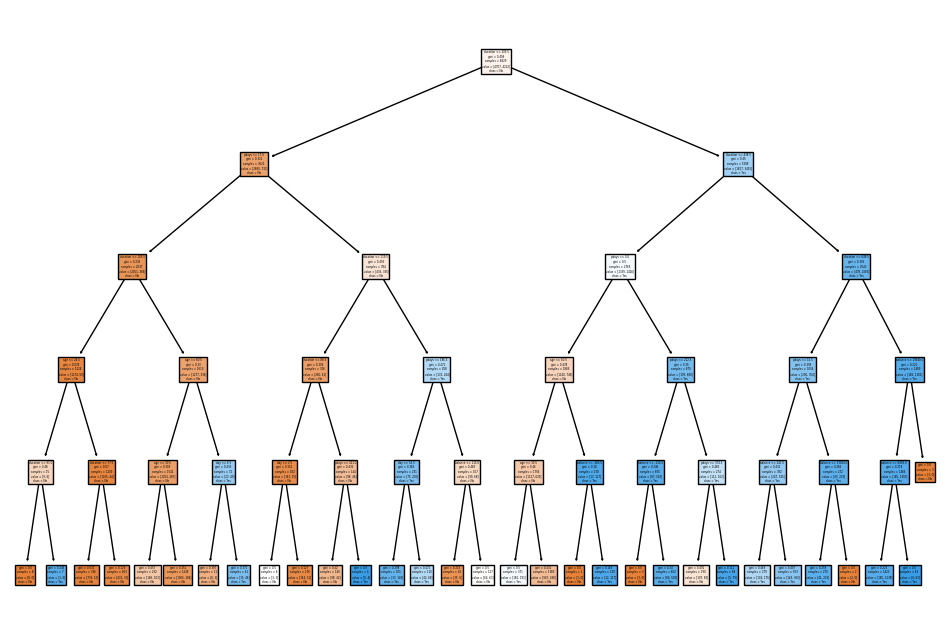

In [130]:
plt.figure(figsize=(12, 8))
plt.title("Decision Tree")
tree.plot_tree(dtc, feature_names=x_encoded.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

# Thank You..........:)